# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cityname=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

In [4]:
units = "imperial"
set_count = 1
record_count = 0
for i, city in enumerate(cities):
    if i % 50 == 0 and i >= 50:
        set_count = set_count +1
        record_count = 1
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count +1
    query_url = f"{url}appid={weather_api_key}&units{units}&q={city}"
    post_response = requests.get(query_url).json()         
    
    try:
        cityname.append(post_response['name'])
        lat.append(post_response['coord']['lat'])
        lng.append(post_response['coord']['lon'])
        max_temp.append(post_response['main']['temp_max'])
        humidity.append(post_response['main']['humidity'])
        cloudiness.append(post_response['clouds']['all'])
        wind_speed.append(post_response['wind']['speed'])
        country.append(post_response['sys']['country'])
        date.append(time.ctime(post_response['dt']))
    except KeyError:
        print("City not found...Skipping...")
    

Processing Record 0 of Set 1 | hobart
Processing Record 1 of Set 1 | uruacu
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | bongandanga
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | kumano
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | kloulklubed
Processing Record 8 of Set 1 | attawapiskat
City not found...Skipping...
Processing Record 9 of Set 1 | bonfim
Processing Record 10 of Set 1 | amderma
City not found...Skipping...
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | port macquarie
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | hays
Processing Record 15 of Set 1 | onega
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | bluff


Processing Record 38 of Set 4 | port shepstone
Processing Record 39 of Set 4 | tual
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | virginia beach
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | garissa
Processing Record 45 of Set 4 | putina
Processing Record 46 of Set 4 | pimentel
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | kailua
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | westport
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | baculin
Processing Record 5 of Set 5 | los llanos de aridane
Processing Record 6 of Set 5 | seoul
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 of Set 5 | cleburne
Processing Record 9 of Set 5 | nishihara
Processing Record 10 of Set 5 | talaya
Processing Record 11 of Set 5 | nantuc

Processing Record 27 of Set 8 | kysyl-syr
Processing Record 28 of Set 8 | boyolangu
Processing Record 29 of Set 8 | chapais
Processing Record 30 of Set 8 | usinsk
Processing Record 31 of Set 8 | hirara
Processing Record 32 of Set 8 | volga
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | ekhabi
Processing Record 35 of Set 8 | doctor pedro p. pena
City not found...Skipping...
Processing Record 36 of Set 8 | formoso do araguaia
City not found...Skipping...
Processing Record 37 of Set 8 | shangrao
Processing Record 38 of Set 8 | rozkishne
Processing Record 39 of Set 8 | bhawana
Processing Record 40 of Set 8 | veraval
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | phan thiet
Processing Record 43 of Set 8 | chimbote
Processing Record 44 of Set 8 | mehamn
Processing Record 45 of Set 8 | malwan
City not found...Skipping...
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | usakos
Processing Record 48 of Set 8 | koumac
Proc

Processing Record 16 of Set 12 | chabahar
Processing Record 17 of Set 12 | alofi
Processing Record 18 of Set 12 | ruteng
Processing Record 19 of Set 12 | renfrew
Processing Record 20 of Set 12 | hibbing
Processing Record 21 of Set 12 | roebourne
Processing Record 22 of Set 12 | kamenka
Processing Record 23 of Set 12 | palana
Processing Record 24 of Set 12 | nelson bay
Processing Record 25 of Set 12 | amarante do maranhao
Processing Record 26 of Set 12 | mogocha
Processing Record 27 of Set 12 | wattegama
Processing Record 28 of Set 12 | husavik
Processing Record 29 of Set 12 | kamyshevatskaya
Processing Record 30 of Set 12 | tambopata
Processing Record 31 of Set 12 | santa cruz del sur
Processing Record 32 of Set 12 | gat
Processing Record 33 of Set 12 | vestmannaeyjar
Processing Record 34 of Set 12 | ganzhou
Processing Record 35 of Set 12 | chalchihuites
Processing Record 36 of Set 12 | camacha
Processing Record 37 of Set 12 | galle
Processing Record 38 of Set 12 | jaunjelgava
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dt ={"City":cityname,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
             "Wind Speed":wind_speed,"Country":country,"Date":date}
weather_df =pd.DataFrame(weather_dt)
weather_df.to_csv('output_data/cities.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,285.93,87,75,8.23,AU,Sun May 2 22:28:33 2021
1,Uruaçu,-14.5247,-49.1408,293.85,70,3,1.51,BR,Sun May 2 22:28:34 2021
2,Mount Gambier,-37.8333,140.7667,288.15,82,75,8.23,AU,Sun May 2 22:28:35 2021
3,Bongandanga,1.5000,21.0500,294.58,89,100,1.03,CD,Sun May 2 22:28:37 2021
4,Hithadhoo,-0.6000,73.0833,301.77,71,98,5.47,MV,Sun May 2 22:28:38 2021


In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,18.530095,23.703347,290.309214,70.457143,54.782143,3.472161
std,32.803677,90.760259,10.060604,20.312979,38.805635,2.402512
min,-54.800000,-175.200000,264.150000,10.000000,0.000000,0.050000
25%,-8.242950,-56.142300,284.202500,58.000000,15.000000,1.777500
50%,20.674000,27.694800,292.150000,74.000000,68.000000,2.980000
75%,46.419875,108.033100,298.150000,87.000000,94.000000,4.630000
max,78.218600,179.316700,306.150000,100.000000,100.000000,22.120000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

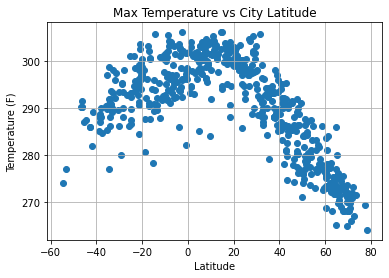

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("Max Temperature vs City Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/MaxTemperaturevsCityLatitude.png")

plt.show()

The above graph is showing the cities maxium temperature in relation to the cities latitude.

## Latitude vs. Humidity Plot

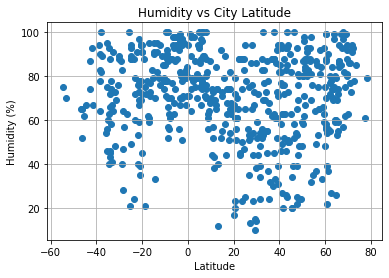

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title("Humidity vs City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/HumidityvsCityLatitude.png")

plt.show()

The above graph is showing the cities humidity in relation to the cities latitude.

## Latitude vs. Cloudiness Plot

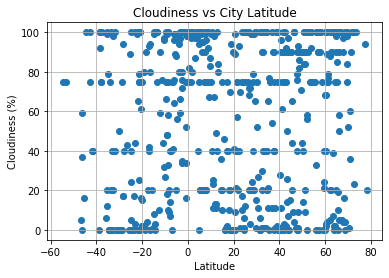

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title("Cloudiness vs City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/CloudinessvsCityLatitude.png")

plt.show()

The above graph is showing the cities cloudiness in relation to the cities latitude.

## Latitude vs. Wind Speed Plot

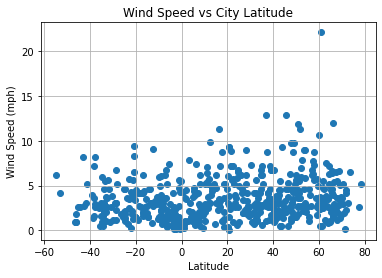

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title("Wind Speed vs City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/WindSpeedvsCityLatitude.png")

plt.show()

The above graph is showing the cities wind speed in relation to the cities latitude.

## Linear Regression

In [13]:
north_weather =weather_df.loc[weather_df["Lat"] >= 0]

south_weather =weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Max Temp"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = -0.48x +306.6'

The r-value is: 0.8045250427925518


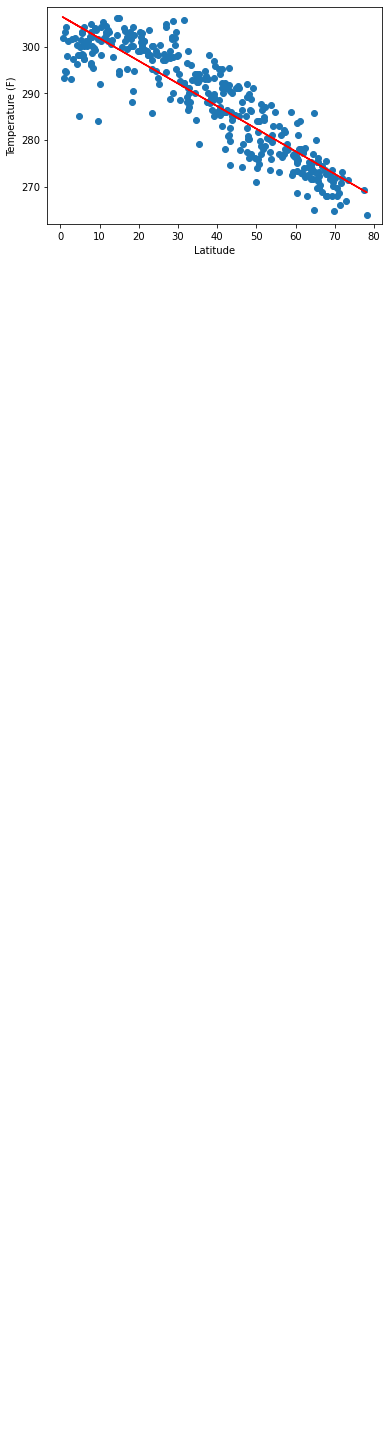

In [15]:
plt.scatter(north_weather["Lat"],north_weather["Max Temp"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NMaxTempvsLatitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Max Temp"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.26x +299.18'

The r-value is: 0.32544992378966947


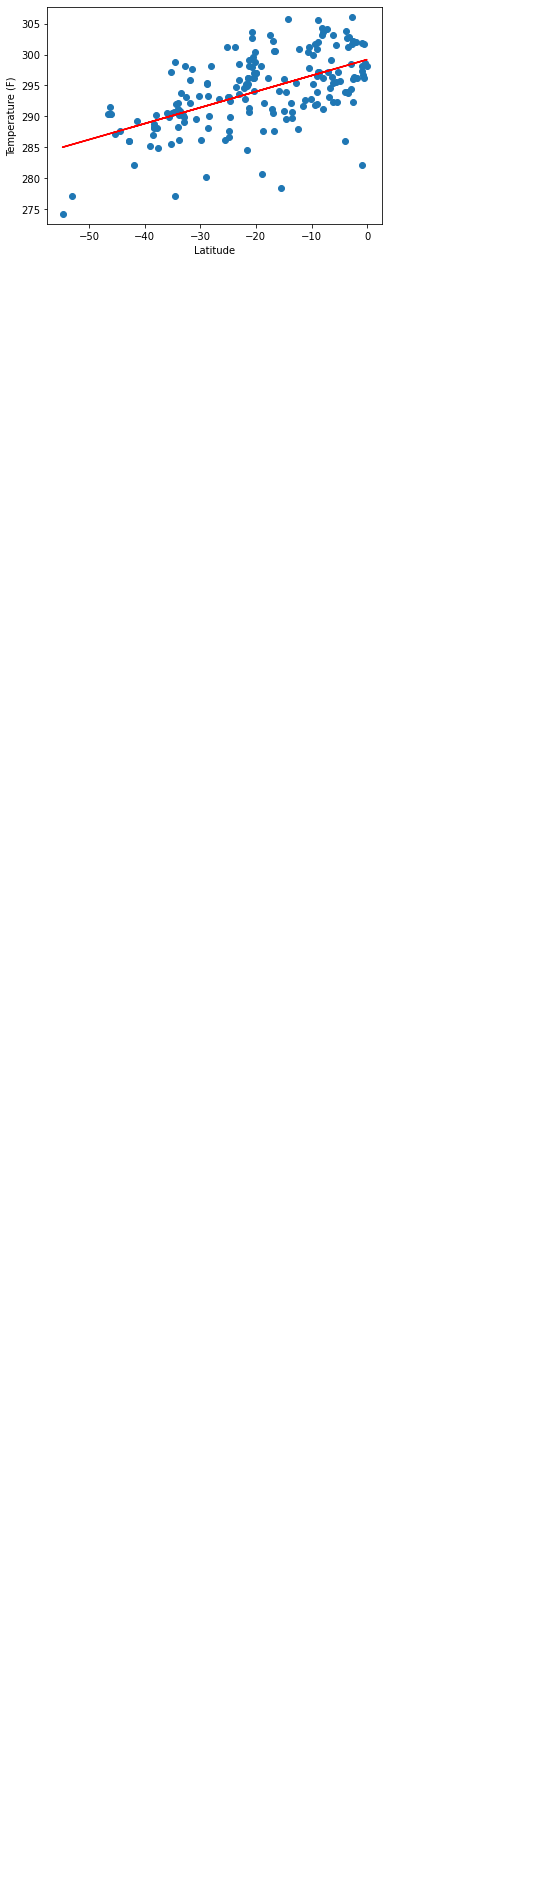

In [17]:
plt.scatter(south_weather["Lat"],south_weather["Max Temp"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SMaxTempvsLatitude.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Humidity"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.05x +66.4'

The r-value is: 0.0021913191109068017


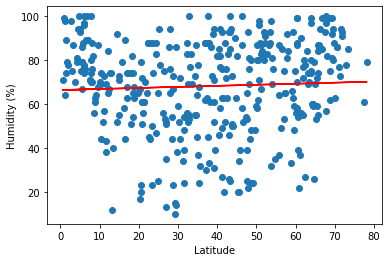

In [19]:
plt.scatter(north_weather["Lat"],north_weather["Humidity"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NHumidityvsLatitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Humidity"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.35x +81.97'

The r-value is: 0.0690075361124046


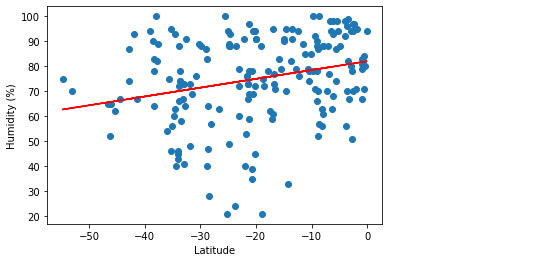

In [21]:
plt.scatter(south_weather["Lat"],south_weather["Humidity"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SHumidityvsLatitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Cloudiness"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.0x +56.32'

The r-value is: 6.243900326374924e-06


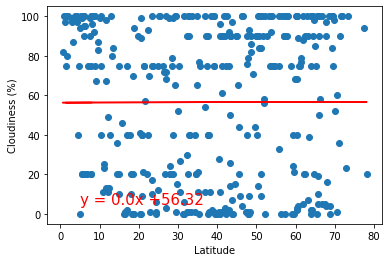

In [23]:
plt.scatter(north_weather["Lat"],north_weather["Cloudiness"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NCloudinessvsLatitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Cloudiness"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.71x +65.44'

The r-value is: 0.05820906674695822


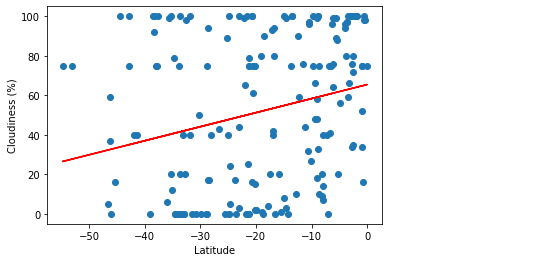

In [25]:
plt.scatter(south_weather["Lat"],south_weather["Cloudiness"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SCloudinessvsLatitude.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Wind Speed"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.02x +3.13'

The r-value is: 0.016507762605614224


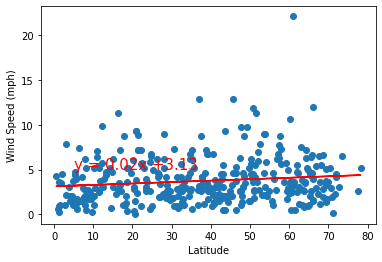

In [27]:
plt.scatter(north_weather["Lat"],north_weather["Wind Speed"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NWindSpeedvsLatitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Wind Speed"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = -0.02x +2.65'

The r-value is: 0.01084671138357673


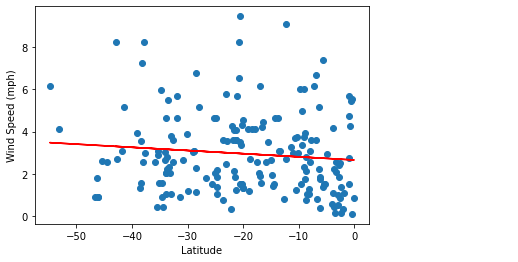

In [29]:
plt.scatter(south_weather["Lat"],south_weather["Wind Speed"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SWindSpeedvsLatitude.png")

plt.show()